# Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import  fetch_openml
mnist = fetch_openml("mnist_784", version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.  \n\nWith some classification methods (particularly template-based methods, such as SVM and K-nearest neighbors), the error rate improves when the digits are centered by bounding box rather than center of mass. If you do this kind of pre-processing, you should report it in your publications. The MNIST database was constructed from NIST's NIST originally designated SD-3 as their training set and SD-1 as their test set. However, SD-3 is much cleaner and easier to recognize than SD-1. The reason for this can be found on the fact that SD-3 was collected among Census Bureau employees, while SD-1 was collected among high-school students. Drawing sensible conclusions from learning experiments requires that the result be independent of the choice of training set and test among the complete set of samples. Therefore it was necessary to build a new database by mixing NIST's datasets.  \n\nThe MNIST training set is composed of 30,000 patterns from SD-3 and 30,000 patterns from SD-1. Our test set was composed of 5,000 patterns from SD-3 and 5,000 patterns from SD-1. The 60,000 pattern training set contained examples from approximately 250 writers. We made sure that the sets of writers of the training set and test set were disjoint. SD-1 contains 58,527 digit images written by 500 different writers. In contrast to SD-3, where blocks of data from each writer appeared in sequence, the data in SD-1 is scrambled. Writer identities for SD-1 is available and we used this information to unscramble the writers. We then split SD-1 in two: characters written by the first 250 writers went into our new training set. The remaining 250 writers were placed in our test set. Thus we had two sets with nearly 30,000 examples each. The new training set was completed with enough examples from SD-3, starting at pattern # 0, to make a full set of 60,000 training patterns. Similarly, the new test set was completed with SD-3 examples starting at pattern # 35,000 to make a full set with 60,000 test patterns. Only a subset of 10,000 test images (5,000 from SD-1 and 5,000 from SD-3) is available on this site. The full 60,000 sample training set is available.\n\nDownloaded from openml.org."

In [3]:
X_df: pd.DataFrame = mnist["data"]
y_s: pd.Series = mnist["target"]

X = X_df.to_numpy()
y = y_s.to_numpy()

y = y.astype(np.uint8)

print(X.shape)
print(y.shape)


(70000, 784)
(70000,)


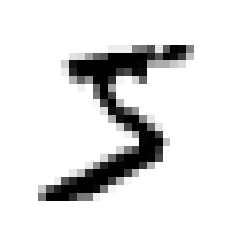

Label for above picture is:  5


In [4]:
some_digit: np.ndarray = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

print("Label for above picture is: ", y[0])

In [5]:
X_train: np.ndarray = X[:60000]
X_test: np.ndarray = X[60000:]
y_train: np.ndarray = y[:60000]
y_test: np.ndarray = y[60000:]

#### Binary Classification

In [6]:
y_train_5: np.ndarray = (y_train == 5)
y_test_5: np.ndarray = (y_test == 5)

In [7]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [8]:
sgd_clf.predict([some_digit])

array([ True])

#### Performance Measures

In [11]:
# Using accuracy
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

NameError: name 'sgd_clf' is not defined

In [12]:
# Confusion Matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

NameError: name 'sgd_clf' is not defined

In [11]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

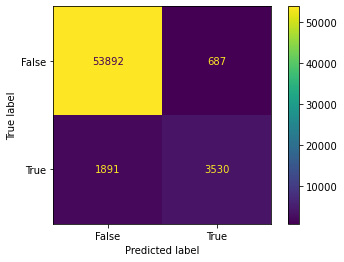

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_train_5, y_train_pred)

In [13]:
# "Perfect" predictions
y_train_perfect_predictions = y_train_5.copy()
confusion_matrix(y_train_5, y_train_perfect_predictions)


array([[54579,     0],
       [    0,  5421]])

$$
precision = \frac{TP}{TP + FP}
$$
$$
recall = \frac{TP}{TP + FN}
$$

In [14]:
from sklearn.metrics import precision_score, recall_score

prec: np.float64 = precision_score(y_train_5, y_train_pred)
rec: np.float64 = recall_score(y_train_5, y_train_pred)
print(f"Precision: {round(prec * 100, 2)}%\nRecall: {round(rec * 100, 2)}%")

Precision: 83.71%
Recall: 65.12%


In [15]:
type(rec)

numpy.float64

Harmonic mean of precision and recall:
$$
F_1 = \frac{2}{\frac{1}{precision} + \frac{1}{recall}} = 2 *  \frac{precision * recall}{precision + recall} = \frac{TP}{TP + \frac{FN + FP}{2}}
$$

In [16]:
from sklearn.metrics import f1_score
f1 = f1_score(y_train_5, y_train_pred)

print(f"F1 score: {round(f1 * 100, 2)}%")

F1 score: 73.25%


In [17]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [18]:
threshold =  0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [19]:
threshold =  3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [20]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [21]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [22]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  fig, ax = plt.subplots()
  ax.plot(thresholds, precisions[:-1], "b--", label="Precision")
  ax.plot(thresholds, recalls[:-1], "g-", label="Recall")
  # ax.set_xlim(-40000, 40000)
  ax.legend(loc="right")

  return fig

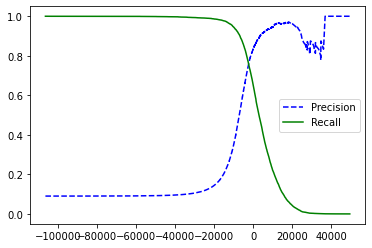

In [23]:
plot = plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

Text(0, 0.5, 'Precision')

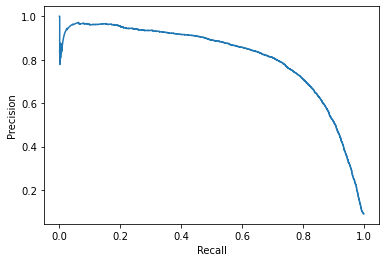

In [24]:
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")

In [25]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

3370.0194991439557

In [26]:
y_train_pred_90 = (y_scores >= threshold_90_precision)
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [27]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [28]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [29]:
def plot_roc_curve(fpr, tpr, label=None, figsize=(15, 10)):
  fig, ax = plt.subplots()
  ax.plot(fpr, tpr, "b--", linewidth=2, label=label)
  ax.plot([0, 1], [0, 1], "k--") # Dashed diagonal

  ax.set_xlabel("False Positive Rate")
  ax.set_ylabel("True Positive Rate (Recall)")

  if label:
    ax.legend()

  fig.set_size_inches(*figsize)

  return fig, ax

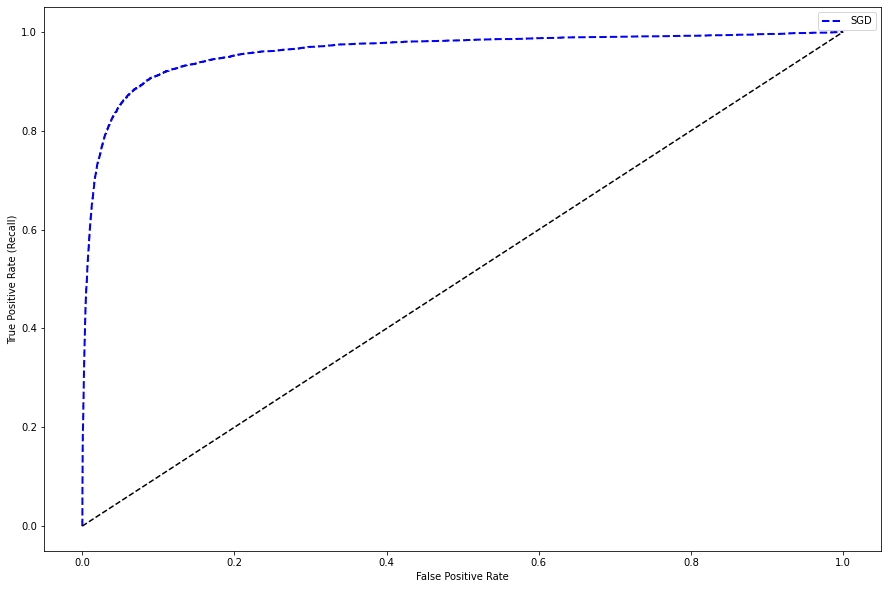

In [30]:
fig, _ = plot_roc_curve(fpr, tpr, "SGD")

In [31]:
from sklearn.metrics import  roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [32]:
# Using Random Forest Clf
from sklearn.ensemble import  RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [33]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

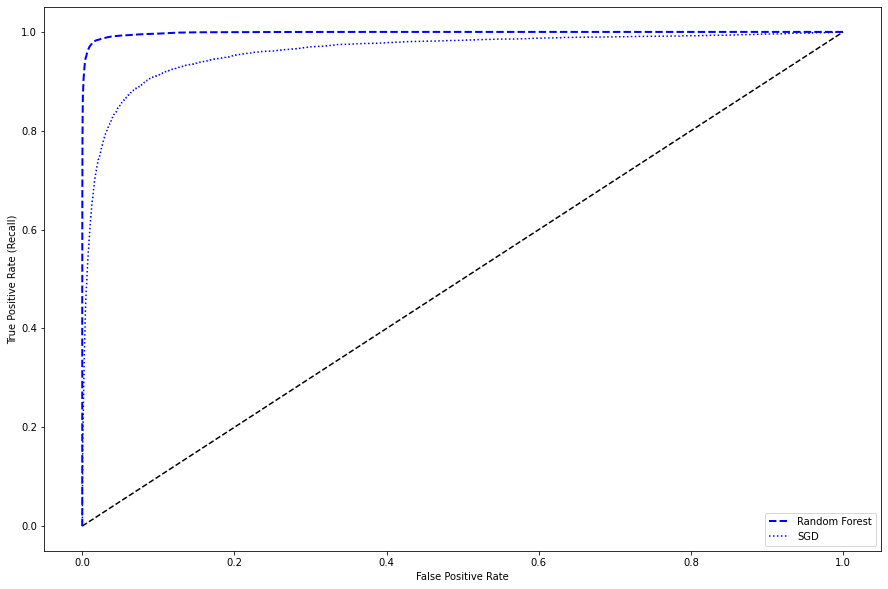

In [34]:
fig, ax = plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
ax.plot(fpr, tpr, "b:", label="SGD")
ax.legend()

In [35]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [36]:
y_train_forest_pred = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

In [37]:
precision_score(y_train_5, y_train_forest_pred)

0.9905083315756169

In [38]:
recall_score(y_train_5, y_train_forest_pred)

0.8662608374838591

In [39]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores_forest)

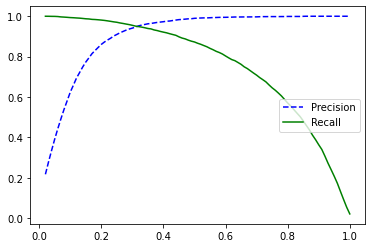

In [40]:
plot = plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

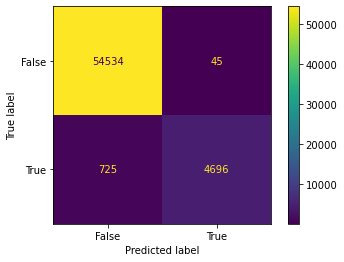

In [41]:
ConfusionMatrixDisplay.from_predictions(y_train_5, y_train_forest_pred)

#### Multiclass Classification

In [42]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [43]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [54]:
highest_score_idx = np.argmax(some_digit_scores)
svm_clf.classes_[highest_score_idx]

CPU times: user 39 µs, sys: 1e+03 ns, total: 40 µs
Wall time: 41.7 µs


5

In [55]:
%%time
# Using ovr strategy

from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

CPU times: user 10min 15s, sys: 778 ms, total: 10min 16s
Wall time: 10min 17s


array([5], dtype=uint8)

In [58]:
len(ovr_clf.estimators_)

10

In [59]:
%%time

sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

CPU times: user 1min 42s, sys: 49.9 ms, total: 1min 42s
Wall time: 1min 42s


array([3], dtype=uint8)

In [60]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

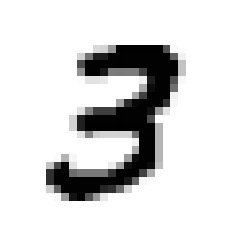

Label for above picture is:  3


In [92]:
some_digit: np.ndarray = X[7]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

print("Label for above picture is: ", y[7])

In [93]:
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [94]:
sgd_clf.decision_function([some_digit])

array([[-27610.27599699, -33782.62206322,  -6343.4343925 ,
          3756.25412024, -20423.1767938 ,  -9381.79838446,
        -61628.43623125, -28855.70780436,  -1274.70722219,
        -10145.68120048]])

In [95]:
sgd_scores = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")
sgd_scores

array([0.87365, 0.85835, 0.8689 ])

In [96]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [97]:
from sklearn.preprocessing import  StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_train_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [98]:
sgd_scores = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")
sgd_scores

array([0.8983, 0.891 , 0.9018])

In [99]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

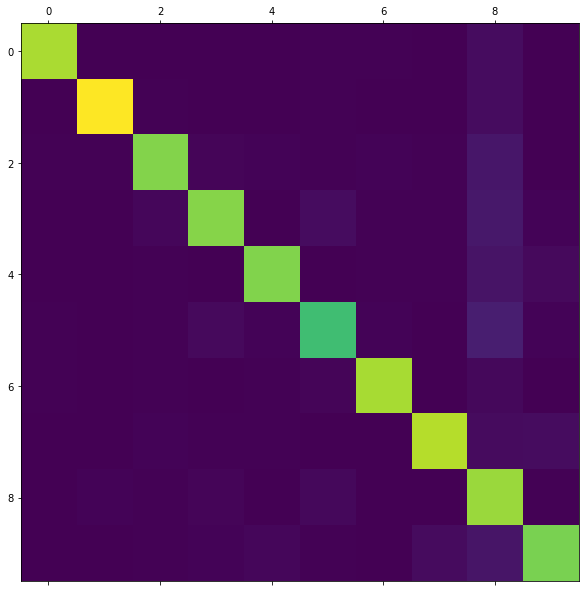

In [112]:
plt.figure(figsize=(10,10))
plt.matshow(conf_mx, fignum=1)
plt.show()

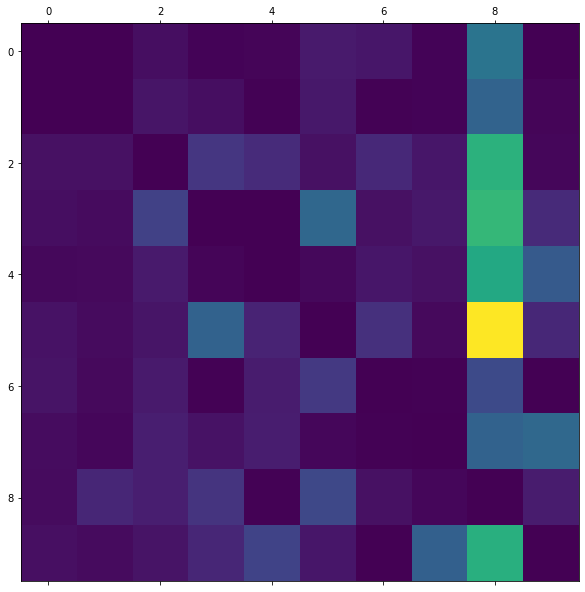

In [114]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)

plt.figure(figsize=(10,10))
plt.matshow(norm_conf_mx, fignum=1)
plt.show()

In [21]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")


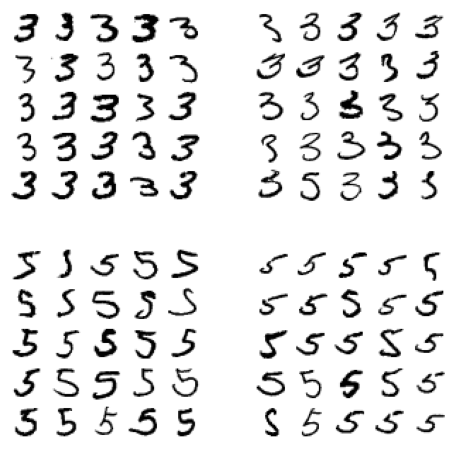

In [119]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8, 8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

### Multilabel Classification

In [7]:
from sklearn.neighbors import  KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [8]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [14]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score

y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

In [15]:
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

0.9778357403921755

### Multioutput classification

In [16]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train * noise

noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test * noise

y_train_mod = X_train
y_test_mod = X_test

In [17]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

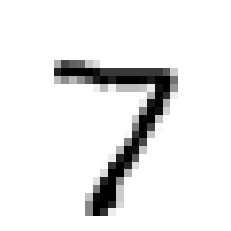

In [33]:
plot_digit(X_test[0])

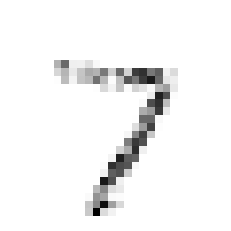

In [34]:
plot_digit(X_test_mod[0])

In [29]:
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

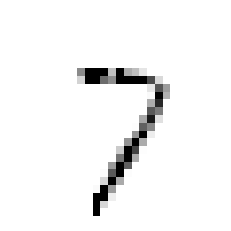

In [38]:
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)